## DATA 300 Final Project
### Personalized Workout Recommendation using Machine Learning Classification technique

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# import XGBoost?

In [5]:
# Read the dataset 
file_path = "C:/Users/ASUS/Downloads/gym-recommendation.csv"
df = pd.read_csv(file_path)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14589 entries, 0 to 14588
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              14589 non-null  int64  
 1   Sex             14589 non-null  object 
 2   Age             14589 non-null  int64  
 3   Height          14589 non-null  float64
 4   Weight          14589 non-null  float64
 5   Hypertension    14589 non-null  object 
 6   Diabetes        14589 non-null  object 
 7   BMI             14589 non-null  float64
 8   Level           14589 non-null  object 
 9   Fitness Goal    14589 non-null  object 
 10  Fitness Type    14589 non-null  object 
 11  Exercises       14589 non-null  object 
 12  Equipment       14589 non-null  object 
 13  Diet            14589 non-null  object 
 14  Recommendation  14589 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.7+ MB
None


,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,2,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,3,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,4,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,5,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [6]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())
print("Rows with any missing values:", df.isnull().any(axis=1).sum())

Missing values per column:
 ID                0
Sex               0
Age               0
Height            0
Weight            0
Hypertension      0
Diabetes          0
BMI               0
Level             0
Fitness Goal      0
Fitness Type      0
Exercises         0
Equipment         0
Diet              0
Recommendation    0
dtype: int64
Rows with any missing values: 0


In [7]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, and Lettuc...",Follow a regular exercise schedule. Adhere to ...
1,Male,18,1.68,47.5,Yes,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...","Light athletic shoes, resistance bands, and li...","Vegetables: (Tomatoes, Garlic, leafy greens, b...",Follow a regular exercise schedule. Adhere to ...
2,Male,18,1.68,47.5,No,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Dumbbells, barbells and Blood glucose monitor","Vegetables: (Garlic, Roma Tomatoes, Capers and...",Follow a regular exercise schedule. Adhere to ...
3,Male,18,1.68,47.5,Yes,Yes,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, yoga, deadlifts, bench presses, and ov...","Light athletic shoes, resistance bands, light ...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...",Follow a regular exercise schedule. Adhere to ...
4,Male,18,1.68,47.5,No,No,16.83,Underweight,Weight Gain,Muscular Fitness,"Squats, deadlifts, bench presses, and overhead...",Dumbbells and barbells,"Vegetables: (Carrots, Sweet Potato, Lettuce); ...",Follow a regular exercise schedule. Adhere to ...


In [8]:
# Encode categorical variables
categorical_cols = ['Sex', 'Hypertension', 'Diabetes', 'Level', 'Fitness Goal', 
                    'Fitness Type', 'Exercises', 'Equipment', 'Diet', 'Recommendation']
# label_encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le  # Save encoder for inverse transform if needed
    
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))
# print("\nEncoding mappings:")
# for col, mapping in encoders.items():
#     print(f"{col}: {mapping}")

df.head()

,Sex,Age,Height,Weight,Hypertension,Diabetes,BMI,Level,Fitness Goal,Fitness Type,Exercises,Equipment,Diet,Recommendation
0,1,18,1.68,47.5,0,0,16.83,3,0,1,1,0,3,6
1,1,18,1.68,47.5,1,0,16.83,3,0,1,1,7,10,5
2,1,18,1.68,47.5,0,1,16.83,3,0,1,2,1,5,3
3,1,18,1.68,47.5,1,1,16.83,3,0,1,2,8,6,1
4,1,18,1.68,47.5,0,0,16.83,3,0,1,1,0,2,6


In [9]:
# Define features (X) and target (y) 
X = df.drop(columns=['Recommendation'])  # define features
y = df['Recommendation']                # define target
print("Column Names:", X.columns.tolist())
X.head()

# Scale X
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)      

Column Names: ['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI', 'Level', 'Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment', 'Diet']


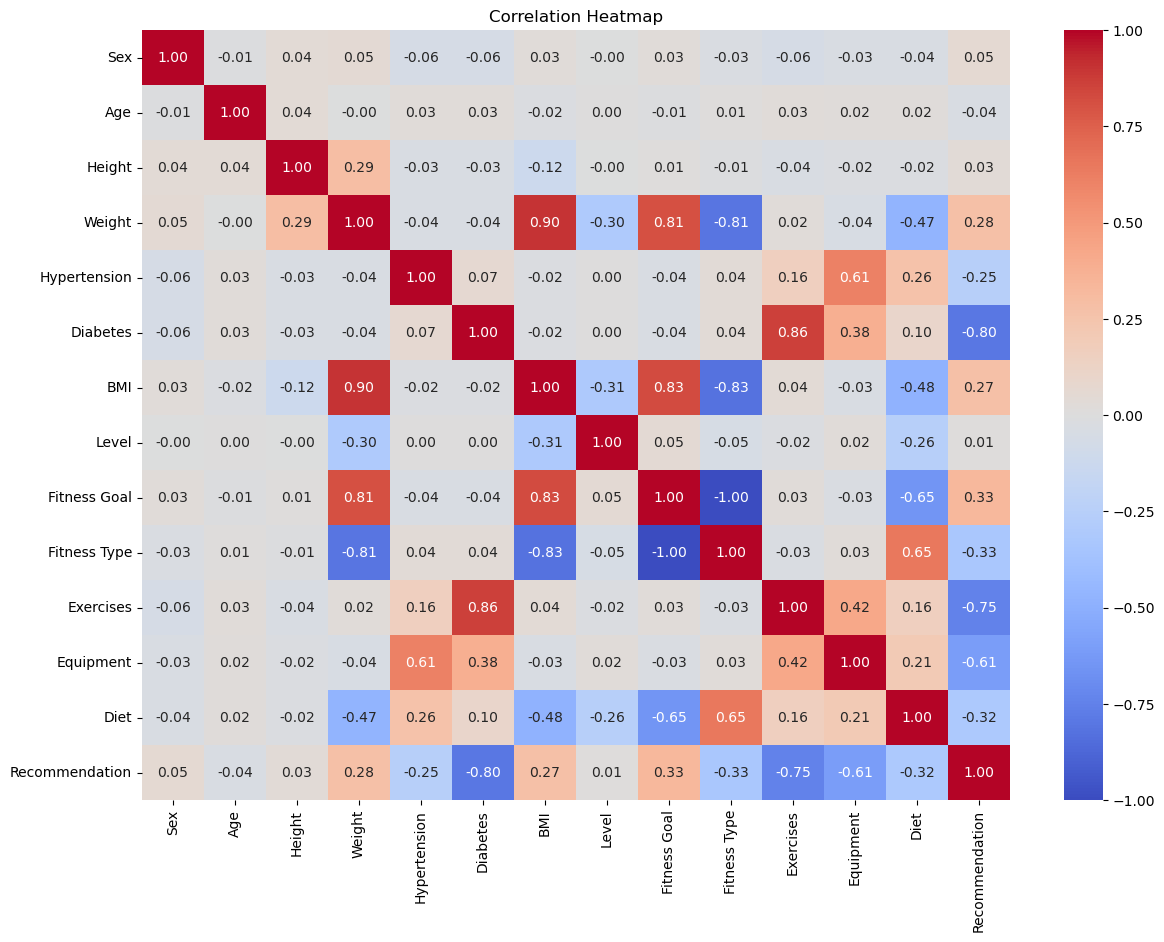

In [10]:
# Correlation heatmap to check for redundant features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Split data: 70% Train, 20% Validation, 10% Test
# First split: Training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# Second split: Validation (20%) and Testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

# Check the sizes of each split
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (10212, 13), (10212,)
Validation set: (2918, 13), (2918,)
Testing set: (1459, 13), (1459,)


In [ ]:
# Random Forest Classifier 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rfc.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on the testing set
y_test_pred = rfc.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
# Feature Importance from Random Forest
importances = rfc.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [12]:
# Initialize the KNN model with 5 neighbors (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

y_val_pred = knn.predict(X_val)

y_test_pred = knn.predict(X_test)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.9246058944482523
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.94      0.95      0.94       337
           2       0.84      0.81      0.82       336
           3       0.94      0.94      0.94       338
           4       0.80      0.84      0.82       336
           5       0.96      0.94      0.95       338
           6       0.95      0.94      0.95       389
           7       0.98      0.99      0.98       501
           8       0.97      0.95      0.96       336

    accuracy                           0.92      2918
   macro avg       0.90      0.93      0.91      2918
weighted avg       0.93      0.92      0.92      2918

Validation Confusion Matrix:
[[  7   0   0   0   0   0   0   0   0]
 [  0 321   2   0   0  14   0   0   0]
 [  0   1 273   0  62   0   0   0   0]
 [  0   0   0 319   0   0  15   0   4]
 [  0   0  51   0 283   0   0   0   

In [13]:
#KNN model with 1 neighbor
knn6 = KNeighborsClassifier(n_neighbors=1)

# Train the model on the training data
knn6.fit(X_train, y_train)

y_val_pred6 = knn6.predict(X_val)

y_test_pred6 = knn6.predict(X_test)

# Evaluate the model on the validation set
val_accuracy6 = accuracy_score(y_val, y_val_pred6)
print("Validation Accuracy:", val_accuracy6)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred6))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred6))

# Evaluate the model on the testing set
test_accuracy6 = accuracy_score(y_test, y_test_pred6)
print("Testing Accuracy:", test_accuracy6)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred6))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred6))

Validation Accuracy: 0.9684715558601782
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.99      0.98      0.98       337
           2       0.97      0.91      0.94       336
           3       0.96      0.96      0.96       338
           4       0.92      0.97      0.94       336
           5       0.98      0.99      0.98       338
           6       0.97      0.97      0.97       389
           7       0.98      0.99      0.99       501
           8       0.98      0.97      0.98       336

    accuracy                           0.97      2918
   macro avg       0.97      0.97      0.97      2918
weighted avg       0.97      0.97      0.97      2918

Validation Confusion Matrix:
[[  7   0   0   0   0   0   0   0   0]
 [  0 329   0   0   0   8   0   0   0]
 [  0   0 306   0  30   0   0   0   0]
 [  0   0   0 324   0   0  12   0   2]
 [  0   0  10   0 325   0   0   0   

In [14]:
#KNN model with 3 neighbors
knn2 = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn2.fit(X_train, y_train)

y_val_pred2 = knn2.predict(X_val)

y_test_pred2 = knn2.predict(X_test)

# Evaluate the model on the validation set
val_accuracy2 = accuracy_score(y_val, y_val_pred2)
print("Validation Accuracy:", val_accuracy2)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred2))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred2))

# Evaluate the model on the testing set
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
print("Testing Accuracy:", test_accuracy2)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred2))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred2))

Validation Accuracy: 0.9324880054832076
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.95      0.95      0.95       337
           2       0.87      0.84      0.85       336
           3       0.94      0.93      0.94       338
           4       0.84      0.88      0.86       336
           5       0.96      0.96      0.96       338
           6       0.95      0.95      0.95       389
           7       0.97      0.98      0.98       501
           8       0.97      0.95      0.96       336

    accuracy                           0.93      2918
   macro avg       0.90      0.92      0.91      2918
weighted avg       0.93      0.93      0.93      2918

Validation Confusion Matrix:
[[  6   0   0   0   0   0   0   1   0]
 [  0 321   1   0   0  15   0   0   0]
 [  0   1 282   0  53   0   0   0   0]
 [  0   0   0 316   0   0  19   0   3]
 [  0   0  41   0 294   0   0   0   

In [15]:
#KNN model with 7 neighbors
knn3 = KNeighborsClassifier(n_neighbors=7)

# Train the model on the training data
knn3.fit(X_train, y_train)

y_val_pred3 = knn3.predict(X_val)

y_test_pred3 = knn3.predict(X_test)

# Evaluate the model on the validation set
val_accuracy3 = accuracy_score(y_val, y_val_pred3)
print("Validation Accuracy:", val_accuracy3)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred3))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred3))

# Evaluate the model on the testing set
test_accuracy3 = accuracy_score(y_test, y_test_pred3)
print("Testing Accuracy:", test_accuracy3)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred3))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred3))

Validation Accuracy: 0.9139821795750515
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.93      0.93      0.93       337
           2       0.80      0.81      0.81       336
           3       0.93      0.91      0.92       338
           4       0.80      0.81      0.80       336
           5       0.95      0.94      0.94       338
           6       0.94      0.94      0.94       389
           7       0.97      0.99      0.98       501
           8       0.98      0.95      0.96       336

    accuracy                           0.91      2918
   macro avg       0.88      0.90      0.89      2918
weighted avg       0.91      0.91      0.91      2918

Validation Confusion Matrix:
[[  6   0   0   0   0   0   0   1   0]
 [  0 314   5   0   0  18   0   0   0]
 [  0   1 273   0  62   0   0   0   0]
 [  0   0   0 309   0   0  24   0   5]
 [  0   1  63   0 271   0   0   0   

In [16]:
#KNN model with 9 neighbors
knn4 = KNeighborsClassifier(n_neighbors=9)

# Train the model on the training data
knn4.fit(X_train, y_train)

y_val_pred4 = knn4.predict(X_val)

y_test_pred4 = knn4.predict(X_test)

# Evaluate the model on the validation set
val_accuracy4 = accuracy_score(y_val, y_val_pred4)
print("Validation Accuracy:", val_accuracy4)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred4))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred4))

# Evaluate the model on the testing set
test_accuracy4 = accuracy_score(y_test, y_test_pred4)
print("Testing Accuracy:", test_accuracy4)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred4))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred4))

Validation Accuracy: 0.8954763536668952
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.90      0.95      0.93       337
           2       0.76      0.80      0.78       336
           3       0.91      0.89      0.90       338
           4       0.78      0.77      0.77       336
           5       0.96      0.90      0.93       338
           6       0.92      0.92      0.92       389
           7       0.95      0.98      0.97       501
           8       0.96      0.91      0.93       336

    accuracy                           0.90      2918
   macro avg       0.87      0.89      0.88      2918
weighted avg       0.90      0.90      0.90      2918

Validation Confusion Matrix:
[[  6   0   0   0   0   0   0   1   0]
 [  0 320   4   0   1  12   0   0   0]
 [  0   2 269   0  65   0   0   0   0]
 [  0   0   0 302   0   0  28   0   8]
 [  0   1  75   0 259   0   0   0   

In [17]:
#KNN model with 11 neighbors
knn5 = KNeighborsClassifier(n_neighbors=11)

# Train the model on the training data
knn5.fit(X_train, y_train)

y_val_pred5 = knn5.predict(X_val)

y_test_pred5 = knn5.predict(X_test)

# Evaluate the model on the validation set
val_accuracy5 = accuracy_score(y_val, y_val_pred5)
print("Validation Accuracy:", val_accuracy5)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred5))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred5))

# Evaluate the model on the testing set
test_accuracy5 = accuracy_score(y_test, y_test_pred5)
print("Testing Accuracy:", test_accuracy5)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred5))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred5))

Validation Accuracy: 0.8920493488690884
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.91      0.95      0.93       337
           2       0.78      0.79      0.79       336
           3       0.89      0.88      0.89       338
           4       0.76      0.80      0.78       336
           5       0.96      0.91      0.93       338
           6       0.91      0.91      0.91       389
           7       0.94      0.98      0.96       501
           8       0.96      0.87      0.91       336

    accuracy                           0.89      2918
   macro avg       0.87      0.90      0.88      2918
weighted avg       0.89      0.89      0.89      2918

Validation Confusion Matrix:
[[  7   0   0   0   0   0   0   0   0]
 [  0 319   5   0   1  12   0   0   0]
 [  0   2 266   0  68   0   0   0   0]
 [  0   0   0 299   0   0  32   0   7]
 [  0   1  64   0 269   0   0   0   

In [ ]:
# Gaussian Naive Bayes because we have continuous features (age, height, weight, BMI)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = gnb.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on the testing set
y_test_pred = gnb.predict(X_test)

# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

In [18]:
# Initialize multinomial logistic regression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on validation set
y_val_pred = logreg.predict(X_val)

# Evaluate on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Predict on test set
y_test_pred = logreg.predict(X_test)

# Evaluate on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Accuracy: 0.9986291980808774
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00       337
           2       1.00      1.00      1.00       336
           3       0.99      0.99      0.99       338
           4       1.00      1.00      1.00       336
           5       1.00      1.00      1.00       338
           6       1.00      1.00      1.00       389
           7       1.00      1.00      1.00       501
           8       0.99      0.99      0.99       336

    accuracy                           1.00      2918
   macro avg       1.00      1.00      1.00      2918
weighted avg       1.00      1.00      1.00      2918

Validation Confusion Matrix:
[[  7   0   0   0   0   0   0   0   0]
 [  0 337   0   0   0   0   0   0   0]
 [  0   0 336   0   0   0   0   0   0]
 [  0   0   0 336   0   0   0   0   2]
 [  0   0   0   0 336   0   0   0   

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Coefficients from Logistic Regression
coefficients = logreg.coef_
feature_names = X.columns
classes = logreg.classes_

# Create a DataFrame to view coefficients per class
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=[f'Class_{cls}' for cls in classes])

# Display the coefficient table
print("Logistic Regression Coefficients:")
print(coef_df.sort_index())


Logistic Regression Coefficients:
               Class_0   Class_1   Class_2   Class_3   Class_4   Class_5  \
Age           0.214238 -0.118355 -0.066690  0.009128 -0.042021 -0.120102   
BMI           0.112446 -0.656562  0.008237 -0.030582  0.158361 -0.428196   
Diabetes     -0.067989  1.273274 -0.666715  2.094660  0.529642 -1.234447   
Diet         -5.021655  0.203483 -4.822509  3.600074  0.961647  4.518632   
Equipment     2.600345  6.518674  7.094318 -4.223741  0.772595  1.668681   
Exercises     0.167943 -0.251417  0.770269 -0.441724  0.260997 -0.027725   
Fitness Goal -0.391908  1.107316 -0.616079 -0.275111  0.111229  0.520041   
Fitness Type  0.549777 -2.092641 -0.384561  0.460374  0.485985 -0.798177   
Height        0.247969 -1.704918 -1.542122  0.254855  0.982367 -0.465803   
Hypertension  0.097164  0.393728  1.102838 -0.671927 -1.592274  0.168760   
Level        -0.152630 -1.623536 -0.543452  0.471702  0.054807 -1.536823   
Sex           0.264950 -0.299846 -0.274418  0.085839 -

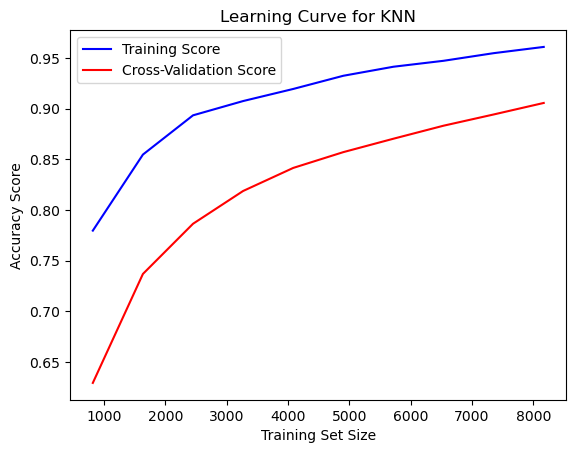

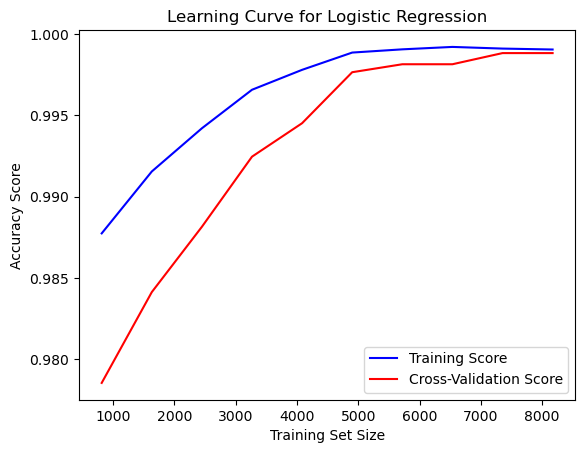

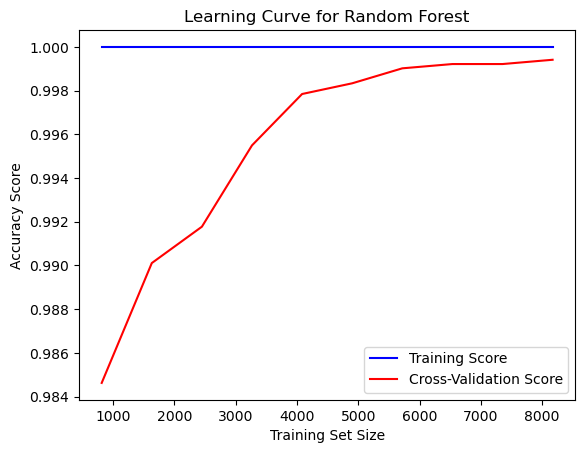

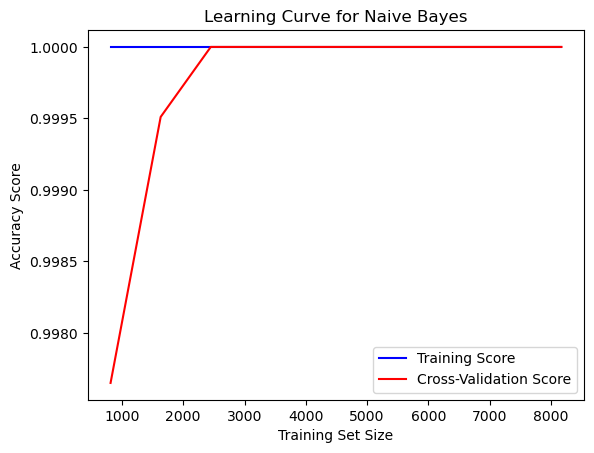

In [40]:
# Generate learning curves to identify whether the model suffers from overfitting or underfitting

def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
    plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="red")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
plot_learning_curve(knn, X_train, y_train, title="Learning Curve for KNN")
plot_learning_curve(logreg, X_train, y_train, title="Learning Curve for Logistic Regression")
plot_learning_curve(rfc, X_train, y_train, title="Learning Curve for Random Forest")
plot_learning_curve(gnb, X_train, y_train, title="Learning Curve for Naive Bayes")

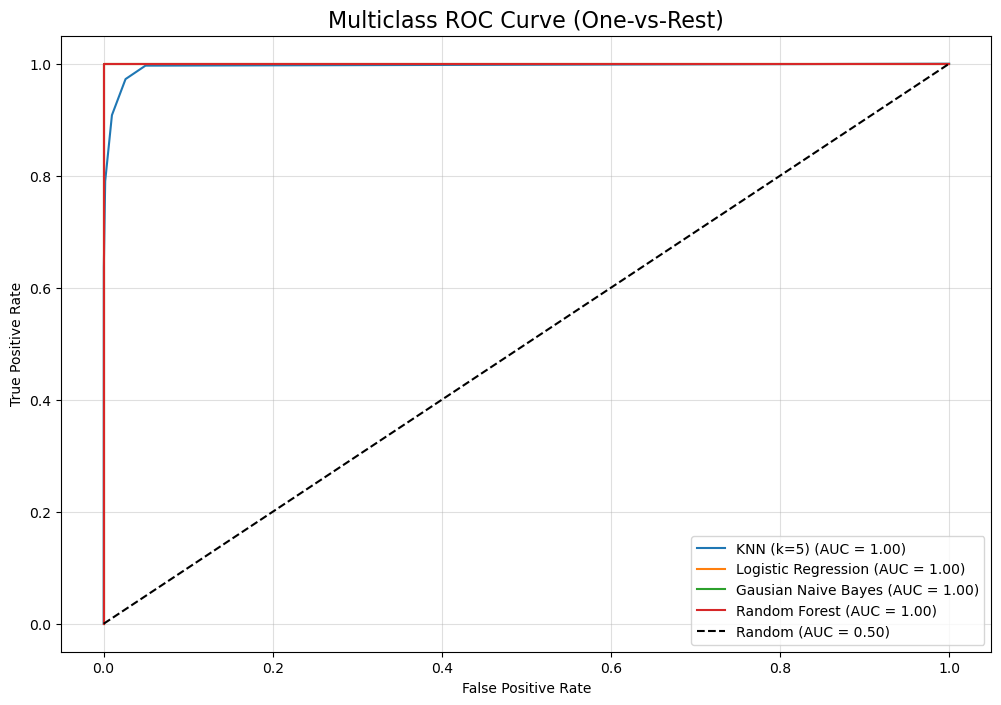

In [42]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plot_multiclass_roc(models, X_test, y_test, class_names):
    """
    Plots ROC curves for each model in a multiclass setting.
    """
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))
    n_classes = y_test_bin.shape[1]

    plt.figure(figsize=(12, 8))

    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            y_score = model.decision_function(X_test)

        # Compute ROC curve and AUC for each class, then average
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        plt.plot(
            fpr["micro"], tpr["micro"],
            label=f"{model_name} (AUC = {roc_auc['micro']:.2f})"
        )

    # Random baseline
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

    plt.title("Multiclass ROC Curve (One-vs-Rest)", fontsize=16)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.4)
    plt.show()

# Get class names if you encoded Recommendation
class_names = label_encoders['Recommendation'].classes_  # or manually set list

# Call the plotting function
plot_multiclass_roc(models, X_test, y_test, class_names)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.910212   0.916004  0.888566  0.900124
1  Logistic Regression  0.997944   0.998020  0.998016  0.998016
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3          Naive Bayes  1.000000   1.000000  1.000000  1.000000


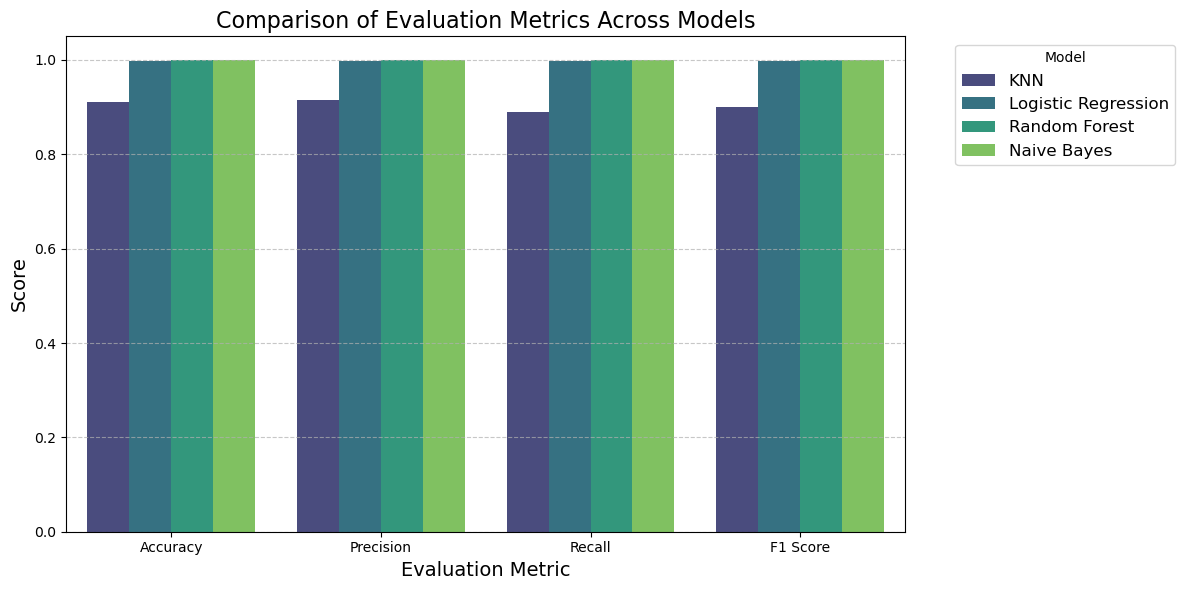

In [44]:
# Table summarizing all evaluation metrics

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1 Score": f1_score(y_test, y_pred, average='macro')
    }

# Compare models
results = []
models = [knn, logreg, rfc, gnb]
model_names = ["KNN", "Logistic Regression", "Random Forest", "Naive Bayes"]

for model, name in zip(models, model_names):
    results.append(evaluate_model(model, X_train, y_train, X_test, y_test, name))

# Convert results into a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


# Visualization: Grouped Bar Chart for Metrics Comparison
plt.figure(figsize=(12, 6))

# Melt the DataFrame to a long format for easier plotting with seaborn
results_long = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a grouped bar plot
sns.barplot(x="Metric", y="Score", hue="Model", data=results_long, palette="viridis")

# Add titles and labels
plt.title("Comparison of Evaluation Metrics Across Models", fontsize=16)
plt.xlabel("Evaluation Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)

# Adjust legend
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


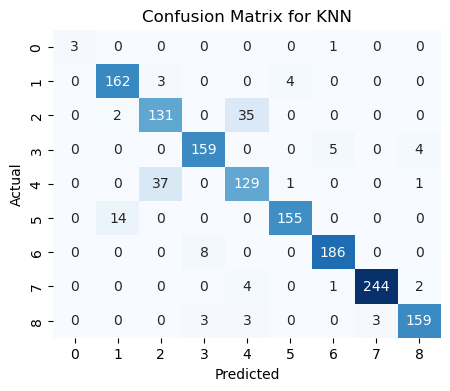

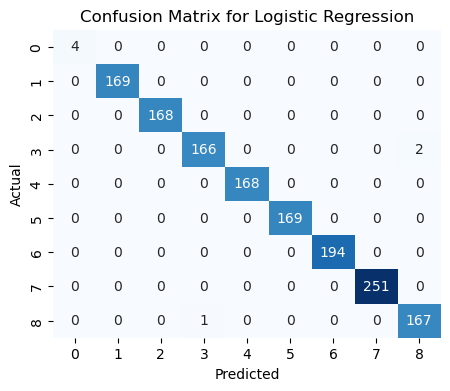

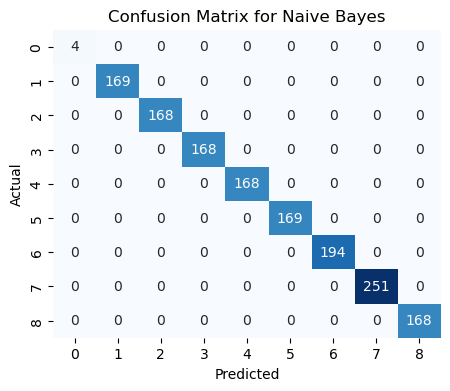

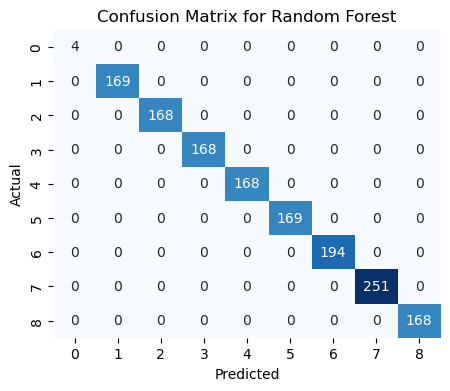

In [45]:
# Confusion matrix visualization
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Example
plot_confusion_matrix(knn, X_test, y_test, "Confusion Matrix for KNN")
plot_confusion_matrix(logreg, X_test, y_test, "Confusion Matrix for Logistic Regression")
plot_confusion_matrix(gnb, X_test, y_test, "Confusion Matrix for Naive Bayes")
plot_confusion_matrix(rfc, X_test, y_test, "Confusion Matrix for Random Forest")